# Binary Classification
In this notebook we will demonstrate different types of binary classifications and analyze each of them.

In [ ]:
#@title Setup Environment
import sklearn
import pandas as pd
import io
import os
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from google.colab import drive
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output

## Loading the Dataset

Now we will load orders dataset from personal google drive. So we must mount the drive and load the dataset from appropriate path.

In [ ]:
#@title Connect to Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/HeartDisease/heart.csv'
people_data = pd.read_csv(file_path)
print("People Dataset Shape: ", people_data.shape)

People Dataset Shape:  (303, 14)


## Getting Some Insights from Our Data

Since a good visualization helps a lot in making sense of our data, we will draw some charts to get better insight about the Ubaar orders dataset. Also we will take a brief look at the dataset

In [ ]:
people_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
people_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Visualization


Let's see the our data distribution

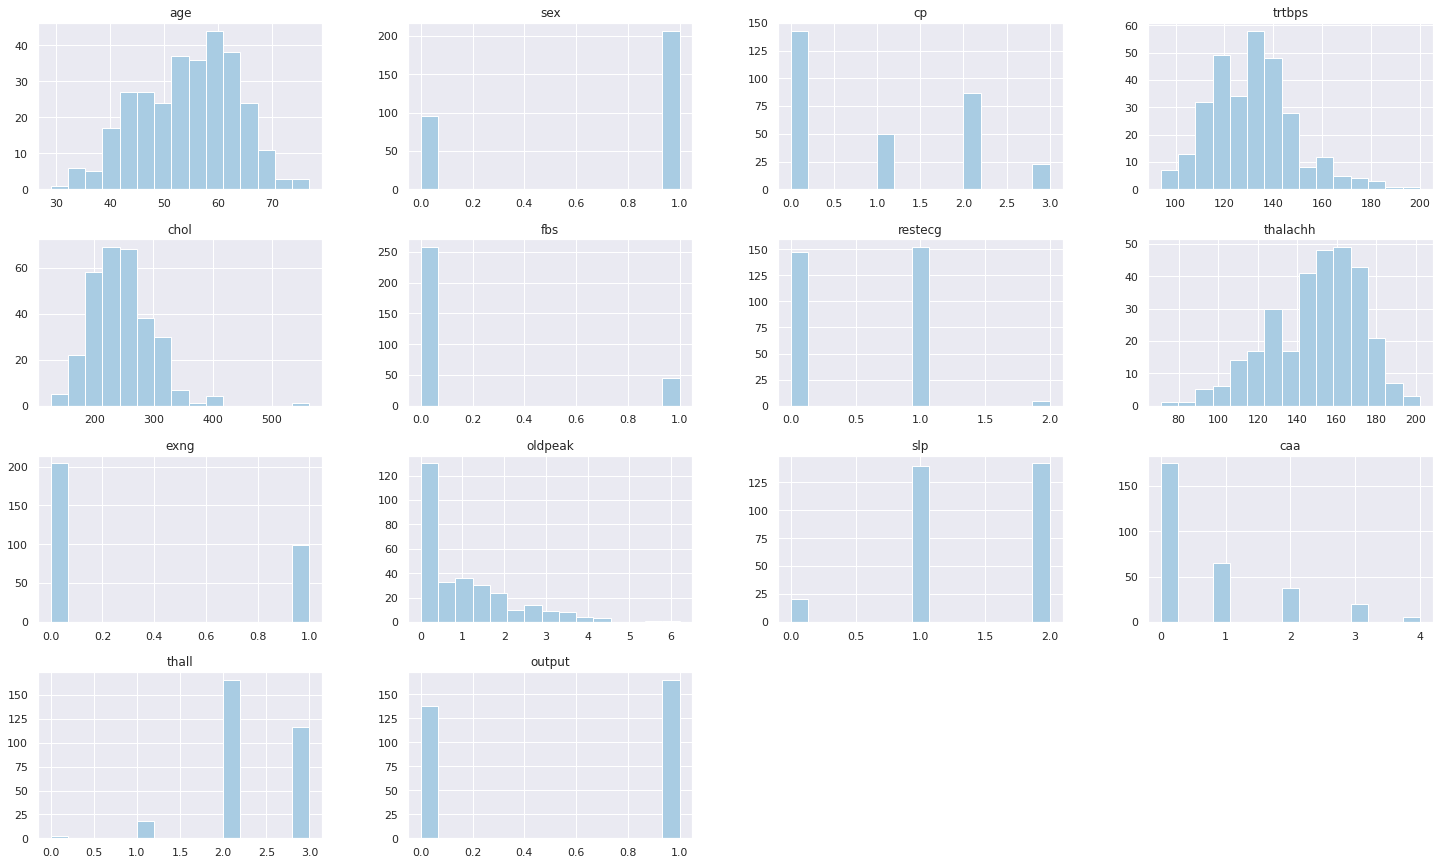

In [ ]:
color = '#a9cce3'
people_data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

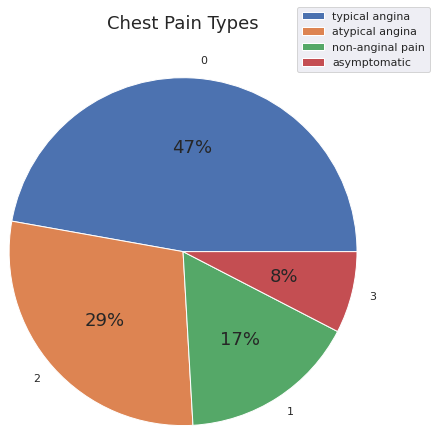

In [ ]:
people_data['cp'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Chest Pain Types', y=1.5,fontsize=18)
plt.legend(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], bbox_to_anchor=(1, 1.3, 0.1, 0.0))
plt.show()

The **cp** column indicates chest pain type whitch:


*   Value 1: typical angina
*   Value 2: atypical angina
*   Value 3: non-anginal pain
*   Value 4: asymptomatic




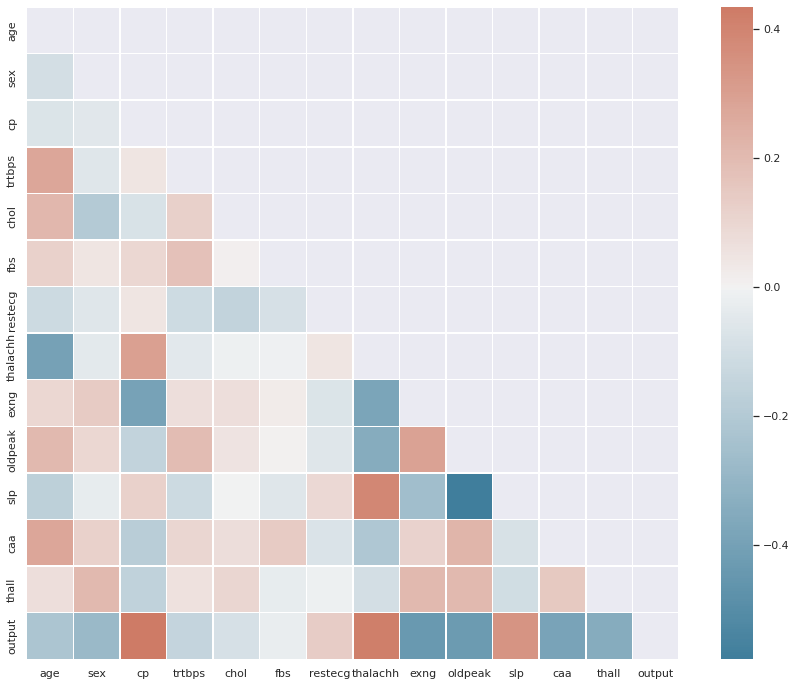

In [ ]:
corr=people_data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

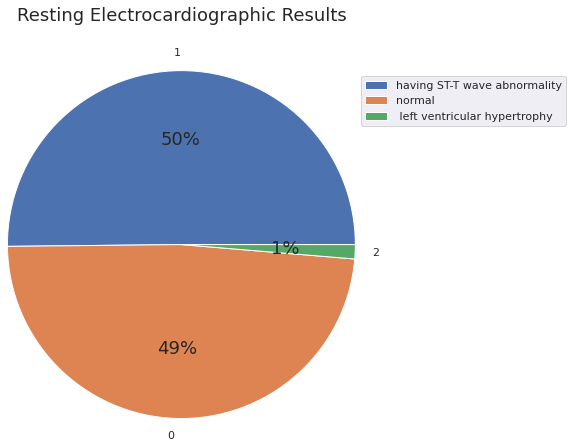

In [ ]:
people_data['restecg'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Resting Electrocardiographic Results', y=1.5,fontsize=18)
plt.legend(['having ST-T wave abnormality', 'normal', ' left ventricular hypertrophy'], bbox_to_anchor=(1.3, 1.3, 0.1, 0.0))
plt.show()

## Data Prepreocessing

 At the last step we will do some feature engineering and normalization and finally seprate the training and testing datasets


### Data Cleaning
As we can see all the data is numerical and there is not any **NaN** field in the dataset so we will escape this part and only do some normalizations.

### Data Normalization



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_scaling_columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']
people_data[standard_scaling_columns] = scaler.fit_transform(people_data[standard_scaling_columns])
people_data[standard_scaling_columns].describe()

,trtbps,chol,thalachh,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [ ]:
# First, let's separate the target column, price
y = people_data.pop('output')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test=train_test_split(people_data,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


##  Logistic Regression for Classification

We know that logistic regression can be used as a method for binary classification. We just need to set a cutoff to divide the output into two classes

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none',max_iter=120)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=120, penalty='none')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.84


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.8530287984111222, 0.8438104448742747, 0.8446341463414635, None)

## Support Vector Machines

Let's use SVM with linear kernel to classify persons with potential hear attack

In [ ]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='linear',max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=2, kernel='linear', max_iter=5000)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.85


### Kernel SVM

In this section we will use SVM with non linear kernels to improve the **F1 Score**. So we will try four different kernels.

In [ ]:
model = SVC(C=1,kernel='poly',degree=2,max_iter=5000)
model.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly', max_iter=5000)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.57


Now we try rbf kernel

In [ ]:
model = SVC(C=1,kernel='rbf',max_iter=10000)    # C = 1 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

SVC(C=1, max_iter=10000)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.57


Trying sigmoid function

In [ ]:
model = SVC(C=1,kernel='sigmoid',max_iter=10000)    # C = 1 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid', max_iter=10000)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.34


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_cnt = 18 #@param {type: "integer"}

model = KNeighborsClassifier(n_neighbors=neighbors_cnt,weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.73


Now let's tune for the best number of neighbors

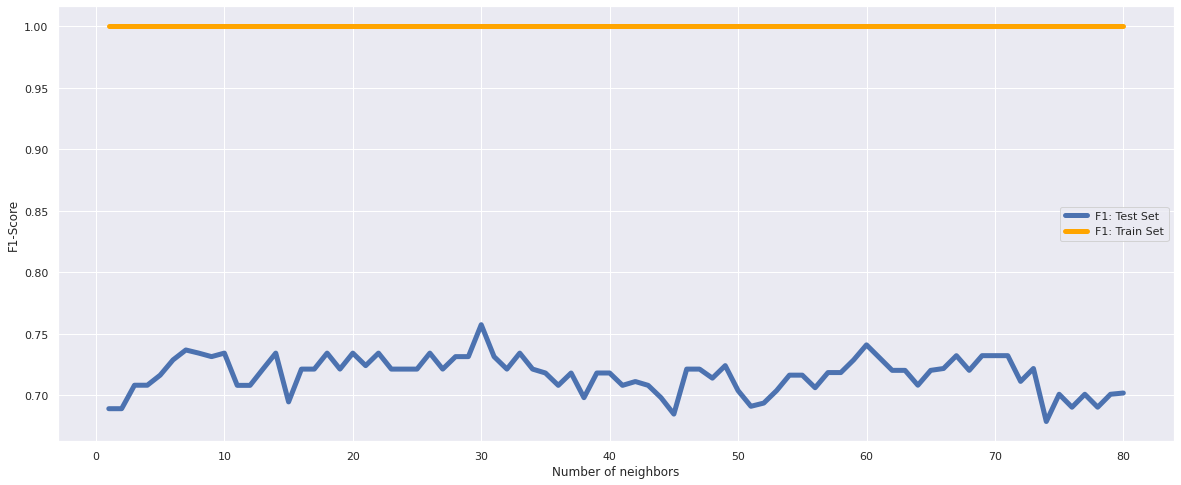

In [ ]:
scores = []
neighbors_list = [n for n in range(1,81)]
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


So the **best F1 Score** is for **30** neighbors

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=9, max_features=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=3)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.81


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.8146341463414635, 0.8118955512572534, 0.8123711340206186, None)

Know let' see how we can tune max depth and prevent overfitting

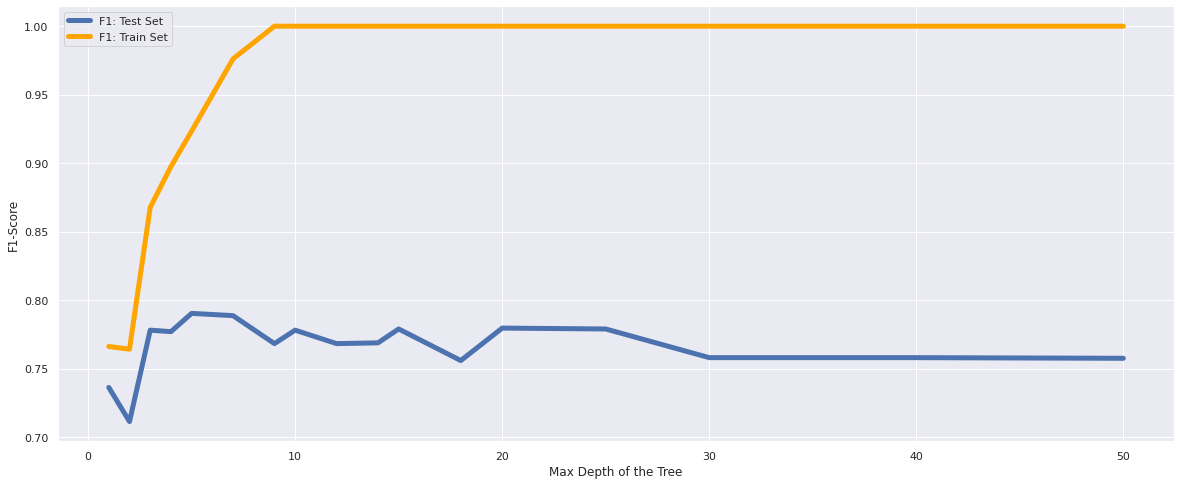

In [ ]:
scores = []
depths_list = [1,2,3,4,5,7,9,10,12,14,15,18,20,25,30,40,50]
scores = []
scores_train = []
for depth in depths_list:

    # Create the model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(depths_list,scores,lw=5)
plt.plot(depths_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_samples=20)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=20)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.85


Know we will check on how **n_estimators** changes will effect our performance.

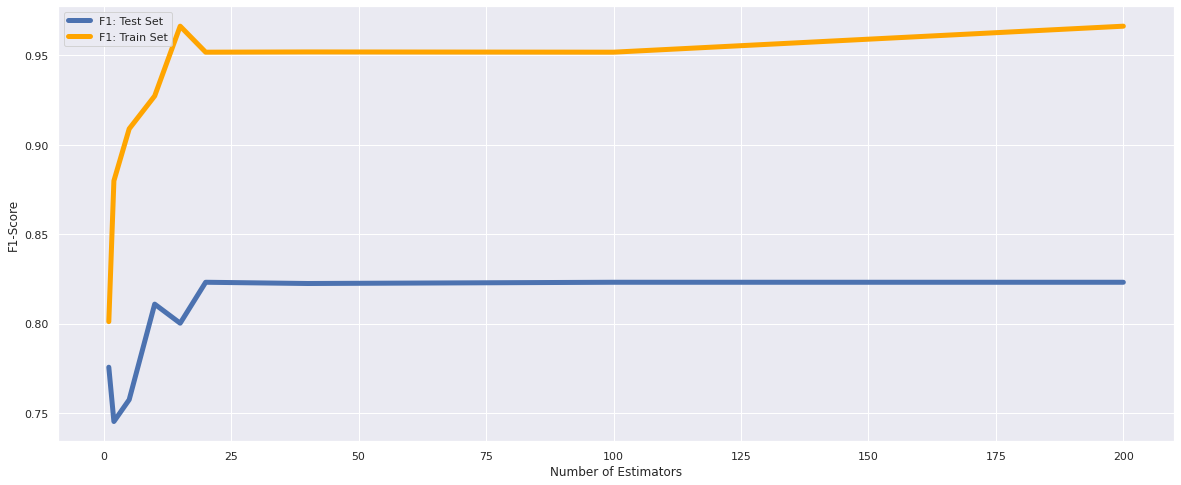

In [ ]:
scores = []
no_estimators = [1,2,5,10,15,20,40,100,200]
scores = []
scores_train = []
for no_estimator in no_estimators:

    # Create the model
    model = RandomForestClassifier(n_estimators=no_estimator,max_depth=5)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_estimators,scores,lw=5)
plt.plot(no_estimators,scores_train,lw=5,color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


Here we will analyze how **max samples** parameter effects our performance

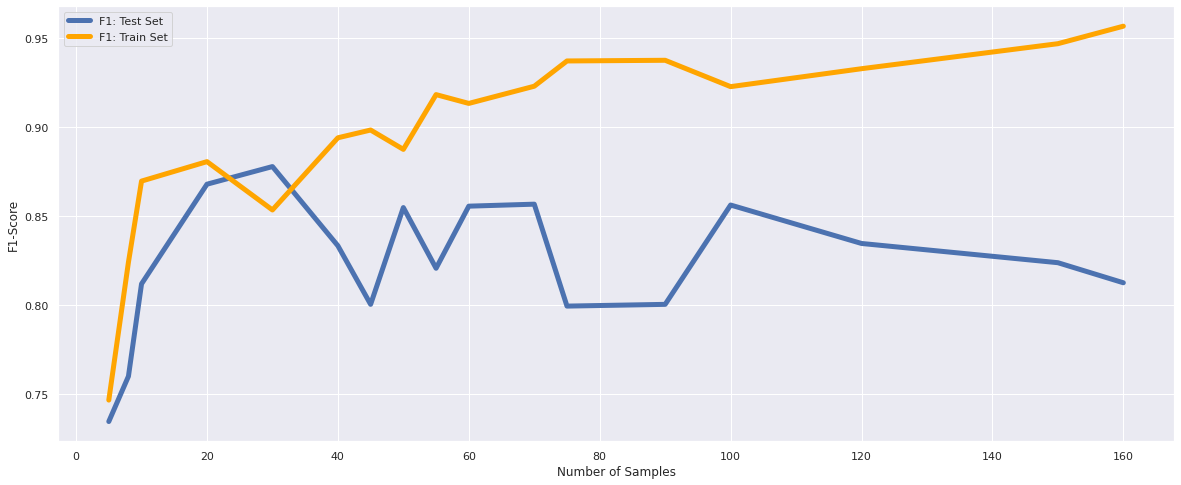

In [ ]:
scores = []
max_samles_list = [5,8,10,20,30,40,45,50,55,60,70,75,90,100,120,150,160]
scores = []
scores_train = []
for max_samles in max_samles_list:

    # Create the model
    model = RandomForestClassifier(n_estimators=50,max_samples=max_samles,max_depth=5)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(max_samles_list,scores,lw=5)
plt.plot(max_samles_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of Samples')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


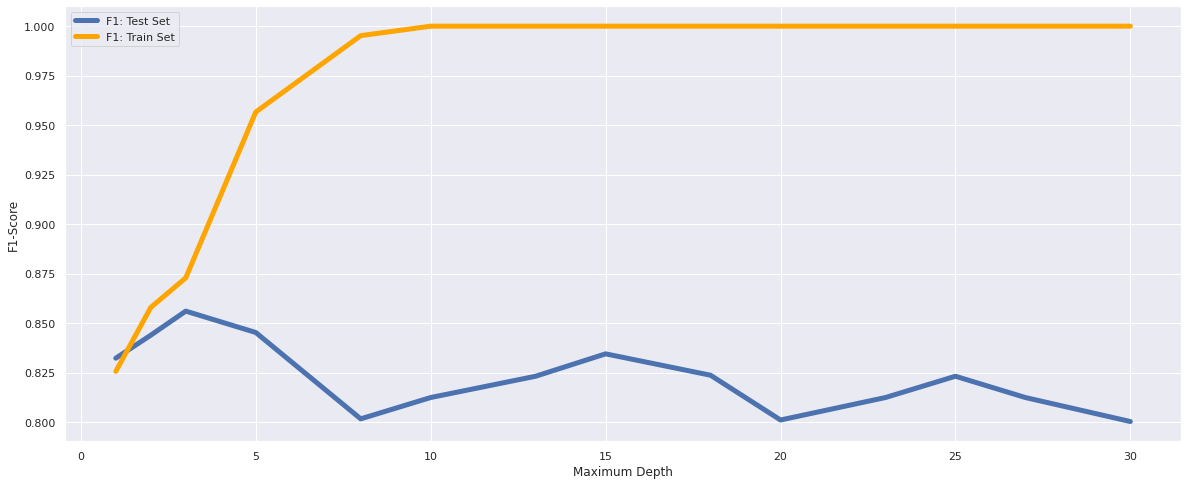

In [ ]:
scores = []
max_depth_list = [1,2,3,5,8,10,13,15,18,20,23,25,27,30]
scores = []
scores_train = []
for max_depth in max_depth_list:

    # Create the model
    model = RandomForestClassifier(n_estimators=100,max_depth=max_depth)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(max_depth_list,scores,lw=5)
plt.plot(max_depth_list,scores_train,lw=5,color='orange')
plt.xlabel('Maximum Depth')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


## Bonus
In this section we try to improve f1 score of the diabetes dataset above 90.


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/Diabetes/diabetes.csv'

df = pd.read_csv(file_path)

print("Dataset Shape: ", df.shape)

Dataset Shape:  (768, 9)


In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Know let's do some data cleaning and replace missing values. So we seprate data to healty and diabetic persons and replace the mean of **'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'** columns for each group seprately

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  df.loc[(df['Outcome']==0) & (df[col]==0), col] = df[(df['Outcome']==0) & (df[col]!=0)][col].mean()
  df.loc[(df['Outcome']==1) & (df[col]==0), col] = df[(df['Outcome']==1) & (df[col]!=0)][col].mean()

Now we do some normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','DiabetesPedigreeFunction']      # Specify the columns to standard scale
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,3.816392e-16,4.718448e-16,-4.371503e-16,2.451743e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552294e+00,-4.002935e+00,-2.494595e+00,-1.189553e+00
25%,-8.448851e-01,-7.209525e-01,-6.966465e-01,-4.762274e-01,-6.889685e-01
50%,-2.509521e-01,-1.543043e-01,-3.538894e-02,-1.398328e-01,-3.001282e-01
75%,6.399473e-01,6.340758e-01,6.258687e-01,4.208250e-01,4.662269e-01
max,3.906578e+00,2.539328e+00,4.097471e+00,7.821507e+00,5.883565e+00


Preparing train and test sets

In [ ]:
# First, let's separate the target column, price
y = df.pop('Outcome')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)


(537, 8)
(231, 8)


Train the random forest model

In [ ]:
#@title Confusion Matrix Utils

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

def draw_confusion_matrix(true_y, pred_y, fig_name=None):
  cm = confusion_matrix(true_y, pred_y)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["healthy", "diabetic"])
  disp.plot()
  if fig_name is not None:
    plt.savefig(fig_name)
  plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# r_forest_clf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=15,
#     n_jobs=4,
#   )
r_forest_clf = RandomForestClassifier(n_estimators=100,max_depth=15)
r_forest_clf.fit(X_train,y_train)
clear_output()
print("Done!")

Done!


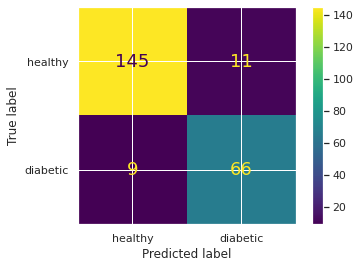

Accuracy =  0.9134199134199135
F1 Score =  0.9019524617996604
Recall Score =  0.88
Precision Score =  0.8571428571428571


In [ ]:
predictions = r_forest_clf.predict(X_test)
draw_confusion_matrix(y_test, predictions)
print("Accuracy = ", accuracy_score(y_test, predictions))
print("F1 Score = ", f1_score(y_test, predictions, average='macro'))
print("Recall Score = ", recall_score(y_test, predictions))
print("Precision Score = ", precision_score(y_test, predictions))

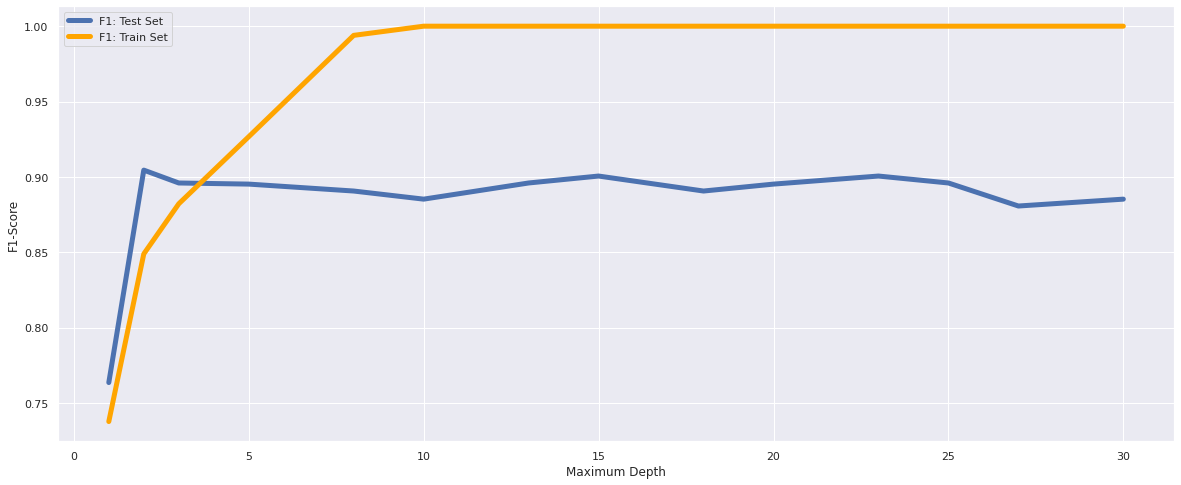

In [ ]:
scores = []
max_depth_list = [1,2,3,5,8,10,13,15,18,20,23,25,27,30]
scores = []
scores_train = []
for max_depth in max_depth_list:

    # Create the
    r_forest_clf = RandomForestClassifier(n_estimators=100,max_depth=max_depth)
    r_forest_clf.fit(X_train, y_train)
    predictions_train = r_forest_clf.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = r_forest_clf.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(max_depth_list,scores,lw=5)
plt.plot(max_depth_list,scores_train,lw=5,color='orange')
plt.xlabel('Maximum Depth')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()
